In [20]:
import opensmile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import LinearRegression
from skimage import feature

In [3]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

## Get Features of Songs and Voices

In [4]:
songs = pd.DataFrame()
for file in os.listdir("SongSamples"):
    if file[0] != ".":
        path = os.path.join("SongSamples",file)
        name = file.split(".mp3")[0]
        song = smile.process_file(path)
        song.index = [name]
        songs  = pd.concat([songs,song])


/bin/sh: sox: command not found
SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [5]:
# Note audio files have not been uploaded and filenames have been removed from process_file("") to protect
# the privacy of the participants
pff = smile.process_file("")
pff.index = ["P5"]
pdd = smile.process_file("")
pdd.index = ["P3"]
paa = smile.process_file("")
paa.index = ["P0"]
pgg = smile.process_file("")
pgg.index = ["P6"]
pcc = smile.process_file("")
pcc.index = ["P2"]
pee = smile.process_file("")
pee.index = ["P4"]
pbb = smile.process_file("")
pbb.index = ["P1"]
people = pd.concat([paa,pbb,pcc,pdd,pee,pff,pgg])

## Mark Which Songs Are Liked

In [2]:
pa = ["Song1","Song2","Song4","Song5","Song6","Song7","Song10","Song13","Song15","Song17","Song20","Song22","Song23","Song24","Song30"]	
pb = ["Song1","Song2","Song5","Song6","Song11","Song13","Song15","Song17","Song20","Song22","Song23"]
pc = ["Song5","Song6","Song17","Song24","Song27"]
pd = ["Song1","Song2","Song7","Song9","Song12","Song13","Song17","Song21","Song23","Song25","Song26","Song30"]	
pe = ["Song1","Song2","Song3","Song5","Song7","Song9","Song10","Song11","Song12","Song13","Song14","Song15","Song17","Song18","Song19","Song20","Song22","Song23","Song24","Song25","Song26","Song28","Song30"]
pf = ["Song1","Song2","Song4","Song5","Song6","Song15","Song17","Song19","Song20","Song21","Song22","Song23","Song24","Song26","Song27","Song30"]
pg = ["Song1","Song3","Song4","Song5","Song6","Song7","Song8","Song9","Song14","Song15","Song16","Song18","Song21","Song22","Song23","Song24","Song25","Song26","Song27","Song30"]
liked = {"P0":pa,"P1":pb,"P2":pc,"P3":pd,"P4":pe,"P5":pf,"P6":pg}

## Make matrix of liked song features and corresponding voice matrix

In [7]:
likedvoice = pd.DataFrame(columns=people.keys())
likedsongs = pd.DataFrame(columns=songs.keys())

for key in liked:
    for song in liked[key]:
        likedsongs = pd.concat([likedsongs,songs.loc[[song]]])
        likedvoice = pd.concat([likedvoice,people.loc[[key]]])

## Cross Correlation Matrix

In [123]:
# De-mean each
lv = np.array(np.nan_to_num(likedvoice.to_numpy(),nan=0.0,posinf=0,neginf=0), dtype=np.float64)
ls = np.array(np.nan_to_num(likedsongs.to_numpy(),nan=0.0,posinf=0,neginf=0), dtype=np.float64)
lv = lv - np.mean(lv,axis=0)
ls = ls - np.mean(ls,axis=0)
num = np.matmul(lv.T,ls)
lvss = np.reshape((lv**2).sum(axis=0),(-1,1))
lsss = np.reshape((ls**2).sum(axis=0),(-1,1))
denom = np.sqrt(np.matmul(lvss,lsss.T))
corr = num/denom
corr = np.nan_to_num(corr,nan=0.0,posinf=0,neginf=0)

/var/folders/tq/5jx5zrlj0zz1pz917gh2hjlh0000gn/T/ipykernel_13624/1226774896.py:10: RuntimeWarning: invalid value encountered in divide
  corr = num/denom


<AxesSubplot: >

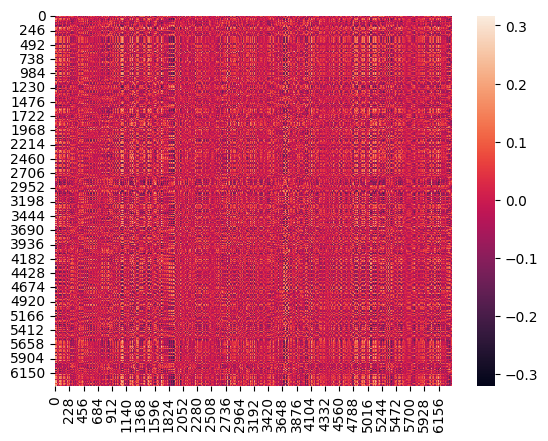

In [114]:
sns.heatmap(corr)


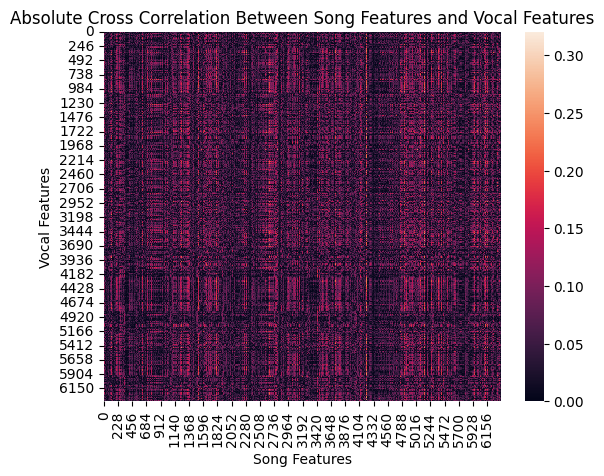

In [133]:
fig = sns.heatmap(np.abs(corr))
plt.xlabel("Song Features")
plt.ylabel("Vocal Features")
plt.title("Absolute Cross Correlation Between Song Features and Vocal Features") # You can comment this line out if you don't need title
plt.show(fig)

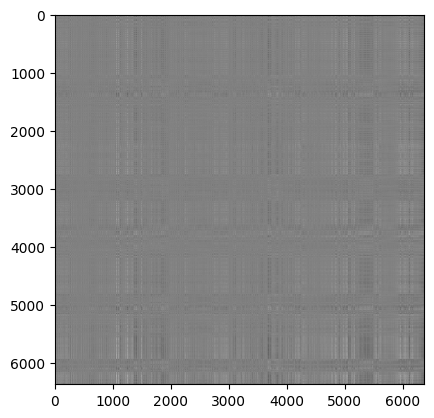

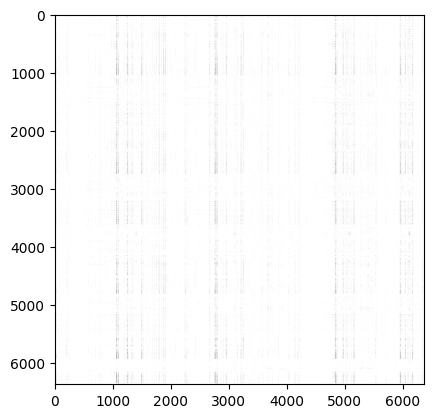

In [134]:
plt.imshow(corr,cmap=plt.cm.gray)
plt.show()

highpassfilter = ((corr > .15)) * corr
plt.imshow(highpassfilter,cmap=plt.cm.gray_r)
plt.show()

## Difference in Song Choices 

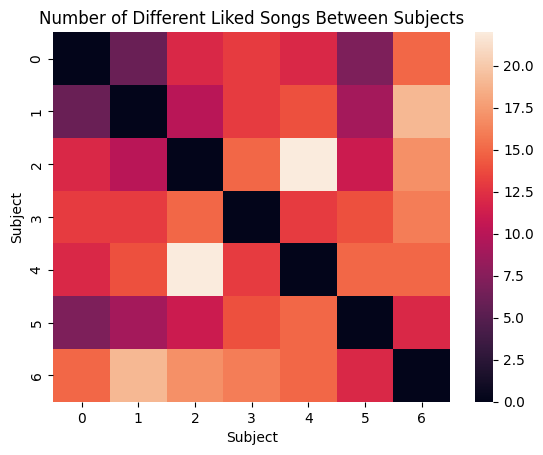

[ 6 12 13 12  7 15 10 13 14  9 19 15 22 11 17 13 14 16 15 15 12]
Mean:  13.333333333333334 Standard Deviation:  3.7058512292499457


In [167]:
all = ["Song1","Song2","Song3","Song4","Song5","Song6","Song7","Song8","Song9","Song10","Song11", "Song12","Song13","Song14","Song15","Song16","Song17","Song18","Song19","Song20","Song21","Song22","Song23","Song24","Song25", "Song26","Song27","Song28","Song29","Song30"]	

mat = []
for person in liked:
    temp = []
    for song in all:
        if song in liked[person]:
            temp.append(1)
        else:
            temp.append(0)
    mat.append(temp)

mat = np.array(mat)
euc = []
for row in mat:
    per = []
    for row2 in mat:
        per.append(np.sum(np.abs(row - row2)))
    euc.append(per)

fig = sns.heatmap(euc)
plt.xlabel("Subject")
plt.ylabel("Subject")
plt.title("Number of Different Liked Songs Between Subjects") # You can comment this line out if you don't need title
plt.show(fig)
euc = np.array(euc)
dists = euc[np.triu_indices(7,k=1)]
print(dists)
print("Mean: ",np.mean(dists), "Standard Deviation: ", np.std(dists,ddof=1))

## Moods Per Song

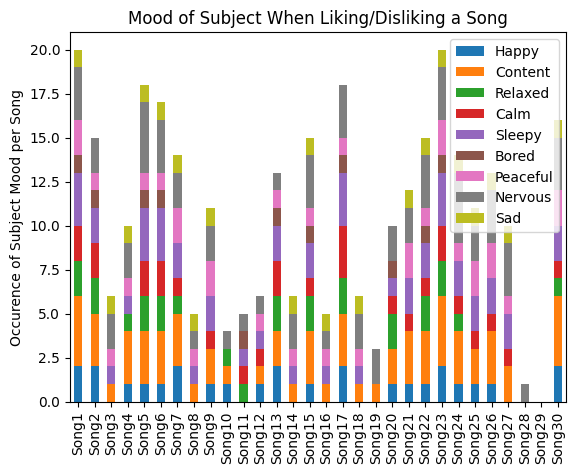

In [16]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

moods = {"P0":["Happy", "Content", "Relaxed"],"P1":["Relaxed", "Calm", "Sleepy", "Bored"],"P2":["Calm", "Sleepy", "Nervous"],"P3":["Happy", "Content", "Peaceful", "Calm", "Sleepy"],"P4":["Nervous"],"P5":["Content", "Nervous"],"P6":["Content", "Peaceful", "Sleepy", "Sad", "Nervous"]}
songmoods = {"Song1":[],"Song2":[],"Song3":[],"Song4":[],"Song5":[],"Song6":[],"Song7":[],"Song8":[],"Song9":[],"Song10":[],"Song11":[], "Song12":[],"Song13":[],"Song14":[],"Song15":[],"Song16":[],"Song17":[],"Song18":[],"Song19":[],"Song20":[],"Song21":[],"Song22":[],"Song23":[],"Song24":[],"Song25":[], "Song26":[],"Song27":[],"Song28":[],"Song29":[],"Song30":[]}

for i, person in enumerate(liked):
    for song in liked[person]:
        songmoods[song].extend(moods[person])

for key in songmoods:
    songmoods[key] = Counter(songmoods[key])

df = pd.DataFrame(songmoods)

df.T.plot(kind="bar", stacked=True,title="Mood of Subject When Liking/Disliking a Song")
plt.ylabel("Occurence of Subject Mood per Song")
plt.show()    	
